# [Markdown Guide cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

In [107]:
#imports
import pandas as pd
import plotly.express as px
import numpy as np

df = pd.read_csv("music_genre.csv")


# Info:
- ### instrumentalness: vocals in a track

- ### speechiness: detects the pressents of vocal words in a track


# Dropping things:


In [108]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #Very good practice to reset how your rows are counted when you drop rows.

In [109]:
#dropping columns
badInfo = ["instance_id","obtained_date","artist_name","track_name"]
df.drop(columns=badInfo,axis=1,inplace=True)

In [110]:
#dropping rows
df.drop(df[(df['duration_ms'] < 0)].index,axis=0,inplace=True)

# table dimensions, columns, etc.

In [17]:
df.shape

(50005, 18)

In [16]:
df.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [24]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
5,47.0,0.00523,0.755,519468.0,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,?,0.614,Electronic


In [60]:
df.tail()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
49994,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.99,0.629,Hip-Hop
49996,72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04,0.113,Hip-Hop
49997,51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.08,0.395,Hip-Hop
49998,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.89,0.354,Hip-Hop
49999,67.0,0.10200,0.862,267267.0,0.642,0.000000,F#,0.272,-13.652,Minor,0.1010,99.20,0.765,Hip-Hop


# checking table columns for certain values

In [19]:
df[df["loudness"] == 0].head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
3741,32470.0,Lil Texas,Total Knock Out,29.0,0.00448,0.64,172800.0,0.999,0.11,F#,0.822,0.0,Minor,0.151,99.986,4-Apr,0.173,Electronic


# editing the table:



In [112]:
#getting rid of '?' in tempo column
df = df.drop(df[df["tempo"] == "?"].index)
df["tempo"] = df["tempo"].astype("float")
#df["tempo"] = np.around(df["tempo"], decimals = -2)
df = df.sort_values(by=["tempo"])

In [111]:
# CHANGING MILLISECONDS TO SECONDS (in duration_ms)

# df["duration_ms"] = df["duration_ms"] * .001
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218.293,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
1,28.0,0.00306,0.620,215.613,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
2,34.0,0.02540,0.774,166.875,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
3,32.0,0.00465,0.638,222.369,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
4,47.0,0.00523,0.755,519.468,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,?,0.614,Electronic


# visuals:

<AxesSubplot:>

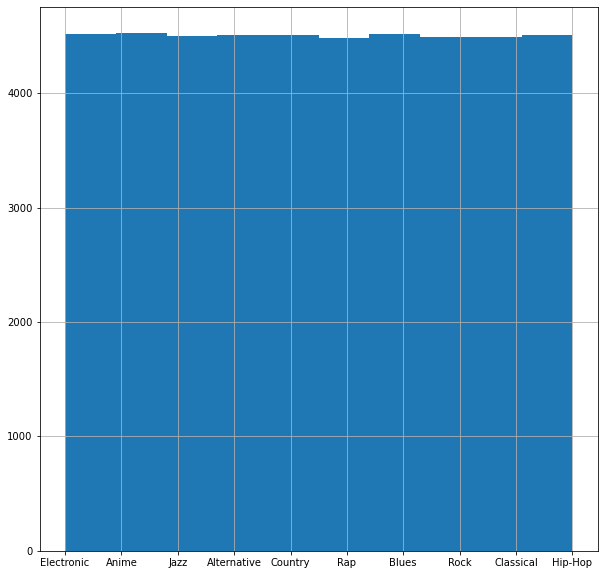

In [102]:
df["music_genre"].hist(figsize = (10, 10))

In [113]:
px.scatter(df, x = "instrumentalness", y = "tempo", color = "music_genre", template="plotly_dark", size = df["duration_ms"])#.update_layout( yaxis={'autorange':'total ascending'})


In [116]:
px.bar(df, x='music_genre', y='tempo', template="plotly_dark",color='duration_ms')